In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv("radiomics_features.csv")
df.head()

,ID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,benign (1),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b75398d30def14870daaa168e56cbc7789e352d0,2D,...,18.737043,0.250762,0.015638,0.059502,0.004672,0.158966,1.575063,0.001290,1.686396e-06,1.223598
1,benign (2),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2bbdb00f7b8c34147af0b4ea299017b66842b066,2D,...,19.762175,0.250080,0.013141,0.052246,0.003365,0.250040,1.000000,0.000213,2.270951e-08,1.000000
2,benign (3),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0436de8220841b51ba2de6f8a868fc92dd66e26b,2D,...,10.329106,0.161324,0.034068,0.609093,0.004476,8.258848,0.003990,6.074451,6.446788e-03,0.197906
3,benign (4),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb85e2002121a80c0f81082f895fbd29ea1c5032,2D,...,19.259829,0.250000,0.013890,0.055561,0.003473,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
4,benign (5),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a71dd4a2796a34dd5213f1820e797dc597467c76,2D,...,19.512027,0.250220,0.013723,0.054013,0.003651,0.250110,1.000000,0.000587,1.720476e-07,1.000000


In [7]:
df2 = pd.read_csv("radiomics_features_with_filters.csv")
df2.shape

(645, 497)

In [4]:
df["label"] = df["ID"].apply(lambda x: 0 if "benign" in x.lower() else 1)

# Remove diagnostic columns-Radiomics generates many "diagnostics_" columns that contain metadata, not features
df = df.loc[:, ~df.columns.str.startswith("diagnostics_")]

y = df["label"] 
X = df.drop(columns=["ID", "label"]) # all radiomics features
X.head()

,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.525883,49.523644,51.623638,983.5,26.043649,134.325902,0.136579,984.0,0.827623,43.0,...,18.737043,0.250762,0.015638,0.059502,0.004672,0.158966,1.575063,0.001290,1.686396e-06,1.223598
1,0.482952,158.288471,166.111408,9383.5,76.445685,410.877200,0.043787,9384.0,0.835748,43.0,...,19.762175,0.250080,0.013141,0.052246,0.003365,0.250040,1.000000,0.000213,2.270951e-08,1.000000
2,0.475362,138.572047,134.733069,7021.5,65.871946,355.036580,0.050564,7022.0,0.836656,34.0,...,10.329106,0.161324,0.034068,0.609093,0.004476,8.258848,0.003990,6.074451,6.446788e-03,0.197906
3,0.659462,62.252986,65.513357,1983.0,41.053455,180.367532,0.090957,1984.0,0.875201,61.0,...,19.259829,0.250000,0.013890,0.055561,0.003473,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
4,0.800129,73.800866,77.833155,3408.0,59.050247,225.237590,0.066091,3409.0,0.918785,49.0,...,19.512027,0.250220,0.013723,0.054013,0.003651,0.250110,1.000000,0.000587,1.720476e-07,1.000000


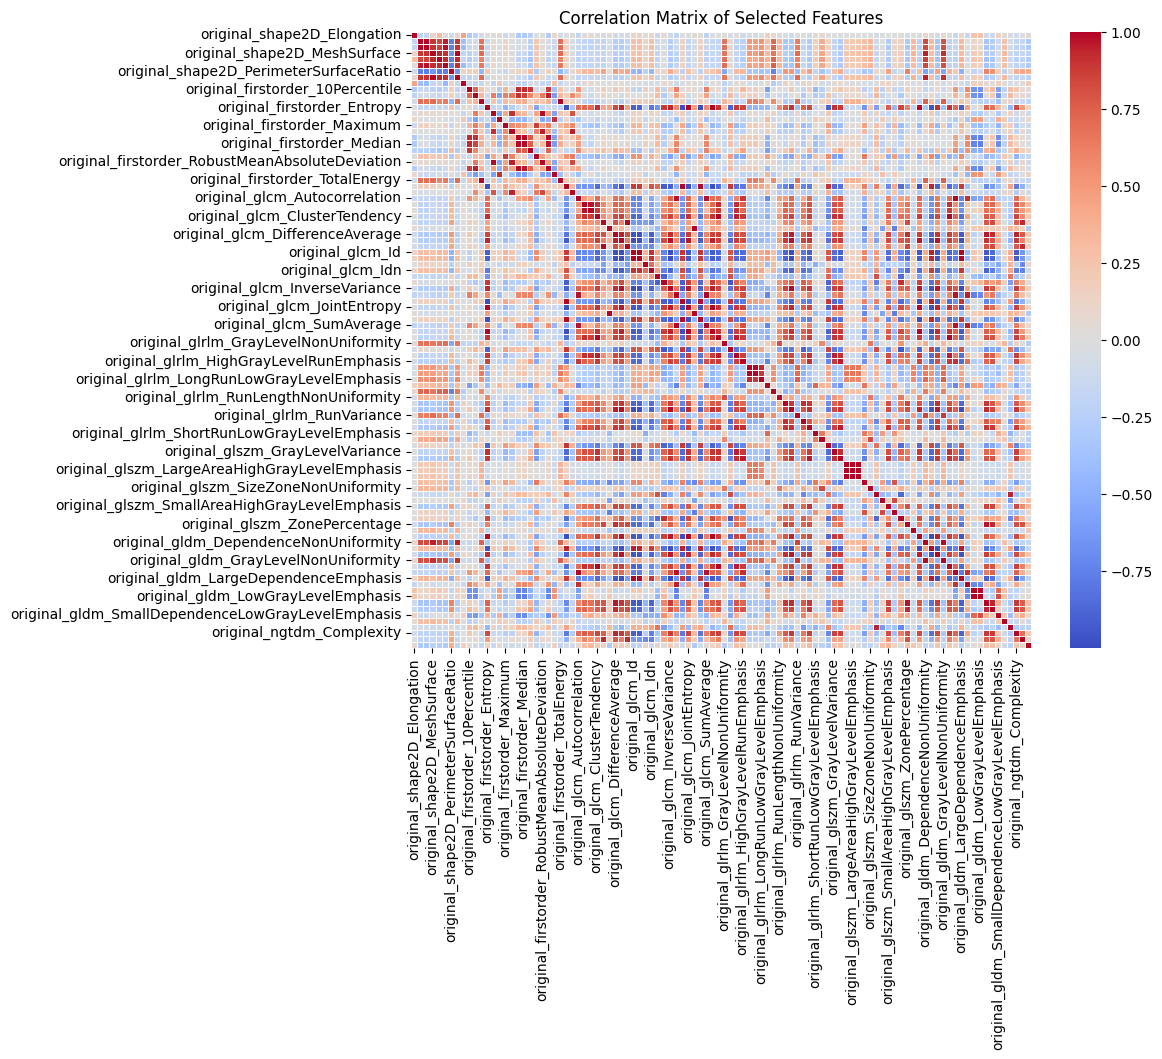

In [6]:
# Compute correlation matrix for selected features only
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()